In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784')

# Criar DataFrame pandas
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target.astype(int)

# Verificar informações do DataFrame
print(mnist_df.info())


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: float64(784), int64(1)
memory usage: 419.2 MB
None


In [5]:
from sklearn.model_selection import train_test_split

# Dividir os dados em features (pixels) e rótulos (target)
X = mnist_df.drop(columns=['target'])
y = mnist_df['target']

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

Tamanho do conjunto de treinamento: 56000 amostras
Tamanho do conjunto de teste: 14000 amostras


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados (valores dos pixels)
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verificar o formato dos dados normalizados
print(f"Formato dos dados de treinamento normalizados: {X_train_normalized.shape}")
print(f"Formato dos dados de teste normalizados: {X_test_normalized.shape}")

Formato dos dados de treinamento normalizados: (56000, 784)
Formato dos dados de teste normalizados: (14000, 784)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir o modelo CNN
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(784,)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Exibir a arquitetura do modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [8]:
# Definir o número de épocas e o tamanho do treinamento
epochs = 10
batch_size = 32

# Treinar o modelo
history = model.fit(X_train_normalized, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Exibir a acurácia do modelo no conjunto de teste
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")

Epoch 1/10
1400/1400 [==============================] - 53s 37ms/step - loss: 0.1573 - accuracy: 0.9513 - val_loss: 0.0739 - val_accuracy: 0.9772
Epoch 2/10
1400/1400 [==============================] - 43s 31ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0453 - val_accuracy: 0.9860
Epoch 3/10
1400/1400 [==============================] - 47s 34ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 4/10
1400/1400 [==============================] - 44s 32ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 5/10
1400/1400 [==============================] - 46s 33ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 6/10
1400/1400 [==============================] - 44s 31ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch 7/10
1400/1400 [==============================] - 45s 32ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0391 -

In [9]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Exibir a perda e a acurácia do modelo no conjunto de teste
print(f"Perda do modelo no conjunto de teste: {test_loss:.4f}")
print(f"Acurácia do modelo no conjunto de teste: {test_accuracy * 100:.2f}%")

438/438 [==============================] - 4s 10ms/step - loss: 0.0448 - accuracy: 0.9903
Perda do modelo no conjunto de teste: 0.0448
Acurácia do modelo no conjunto de teste: 99.03%


In [17]:
# Obter os pesos do modelo treinado
weights = model.get_weights()

# Converter cada array de pesos em uma lista de valores
weights_list = [w.flatten().tolist() for w in weights]

# Criar um DataFrame com as listas de valores dos pesos
df_weights = pd.DataFrame(weights_list)

# Salvar o DataFrame em um arquivo CSV
df_weights.to_csv('modelo_pesos.csv', index=False)

print("Modelo treinado salvo em 'modelo_pesos.csv'.")

Modelo treinado salvo em 'modelo_pesos.csv'.


Digite um número de 0 a 9 para visualizar a imagem correspondente: 3
1/1 [==============================] - 0s 23ms/step


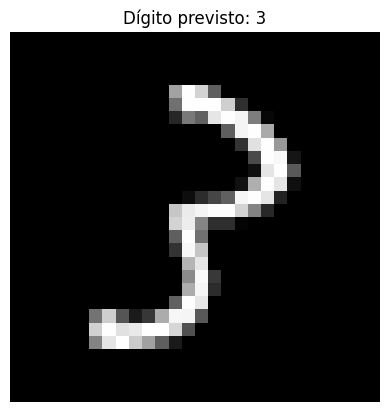

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Função para mostrar uma imagem do conjunto MNIST
def show_image(index):
    # Converter o índice para um número de 0 a 9
    digit = np.argmax(model.predict(X_test_normalized[index:index+1]), axis=-1)[0]

    # Exibir a imagem
    plt.imshow(X_test_normalized[index].reshape(28, 28), cmap='gray')
    plt.title(f'Dígito previsto: {digit}')
    plt.axis('off')
    plt.show()

# Solicitar ao usuário para digitar um número de 0 a 9
char_input = input("Digite um número de 0 a 9 para visualizar a imagem correspondente: ")

# Validar o input do usuário
try:
    char_input = int(char_input)
    if char_input < 0 or char_input > 9:
        raise ValueError
except ValueError:
    print("Entrada inválida. Por favor, digite um número de 0 a 9.")
else:
    # Encontrar o índice da primeira imagem correspondente ao dígito digitado
    index = np.argmax(y_test == char_input)

    if index:
        # Mostrar a imagem correspondente ao dígito
        show_image(index)
    else:
        print(f"Não há imagens do dígito {char_input} no conjunto de teste.")
